# Wine Quality prediction using ANN

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
data = pd.read_csv('./WineQT.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [3]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


#### Lets set the quality of wine as good when quality is 6 and others to lower quality

In [6]:
data['Good'] = [1 if quality >=6 else 0 for quality in data['quality']]

In [7]:
data.drop(columns='quality', inplace=True)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id,Good
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1592,1
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1593,1
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1594,0
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1595,1


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x = data.drop(columns='Good').values
y = data['Good'].values

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc =StandardScaler()

In [13]:
x_train_scaled = sc.fit_transform(x_train)

In [14]:
x_test_scaled= sc.transform(x_test)

In [15]:
x_train_scaled.shape

(914, 12)

## Model buliding

In [16]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(32, input_shape = (12,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [17]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name= 'accuarcy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ],
    loss=tf.keras.losses.binary_crossentropy
)

In [18]:
history = model.fit(x_train_scaled, y_train, epochs=159)

Epoch 1/159
29/29 [==============================] - 1s 2ms/step - loss: 0.6268 - accuarcy: 0.6772 - precision: 0.7206 - recall: 0.6579
Epoch 2/159
29/29 [==============================] - 0s 1ms/step - loss: 0.5544 - accuarcy: 0.7319 - precision: 0.7798 - recall: 0.7024
Epoch 3/159
29/29 [==============================] - 0s 1ms/step - loss: 0.5320 - accuarcy: 0.7484 - precision: 0.7694 - recall: 0.7632
Epoch 4/159
29/29 [==============================] - 0s 2ms/step - loss: 0.5232 - accuarcy: 0.7505 - precision: 0.7588 - recall: 0.7895
Epoch 5/159
29/29 [==============================] - 0s 1ms/step - loss: 0.5371 - accuarcy: 0.7418 - precision: 0.7500 - recall: 0.7834
Epoch 6/159
29/29 [==============================] - 0s 2ms/step - loss: 0.5191 - accuarcy: 0.7538 - precision: 0.7632 - recall: 0.7895
Epoch 7/159
29/29 [==============================] - 0s 1ms/step - loss: 0.4983 - accuarcy: 0.7713 - precision: 0.7800 - recall: 0.8036
Epoch 8/159
29/29 [=============================

29/29 [==============================] - 0s 1ms/step - loss: 0.4334 - accuarcy: 0.7976 - precision: 0.7668 - recall: 0.8988
Epoch 61/159
29/29 [==============================] - 0s 1ms/step - loss: 0.4305 - accuarcy: 0.7812 - precision: 0.7450 - recall: 0.9049
Epoch 62/159
29/29 [==============================] - 0s 1ms/step - loss: 0.4346 - accuarcy: 0.7702 - precision: 0.7320 - recall: 0.9069
Epoch 63/159
29/29 [==============================] - 0s 1ms/step - loss: 0.5152 - accuarcy: 0.7309 - precision: 0.6813 - recall: 0.9433
Epoch 64/159
29/29 [==============================] - 0s 1ms/step - loss: 0.5115 - accuarcy: 0.7352 - precision: 0.6981 - recall: 0.8988
Epoch 65/159
29/29 [==============================] - 0s 1ms/step - loss: 0.4542 - accuarcy: 0.7823 - precision: 0.7565 - recall: 0.8806
Epoch 66/159
29/29 [==============================] - 0s 1ms/step - loss: 0.4813 - accuarcy: 0.7637 - precision: 0.7179 - recall: 0.9271
Epoch 67/159
29/29 [==============================] - 

29/29 [==============================] - 0s 2ms/step - loss: 0.4324 - accuarcy: 0.7790 - precision: 0.7370 - recall: 0.9190
Epoch 120/159
29/29 [==============================] - 0s 1ms/step - loss: 0.3976 - accuarcy: 0.7877 - precision: 0.7358 - recall: 0.9474
Epoch 121/159
29/29 [==============================] - 0s 1ms/step - loss: 0.3933 - accuarcy: 0.8009 - precision: 0.7557 - recall: 0.9332
Epoch 122/159
29/29 [==============================] - 0s 1ms/step - loss: 0.3880 - accuarcy: 0.7954 - precision: 0.7496 - recall: 0.9332
Epoch 123/159
29/29 [==============================] - 0s 1ms/step - loss: 0.3803 - accuarcy: 0.8009 - precision: 0.7609 - recall: 0.9211
Epoch 124/159
29/29 [==============================] - 0s 1ms/step - loss: 0.3849 - accuarcy: 0.8042 - precision: 0.7612 - recall: 0.9291
Epoch 125/159
29/29 [==============================] - 0s 1ms/step - loss: 0.3825 - accuarcy: 0.8074 - precision: 0.7548 - recall: 0.9534
Epoch 126/159
29/29 [===========================

### Model evaluation

In [19]:
from matplotlib import rcParams

In [20]:
rcParams['figure.figsize'] = (18,8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

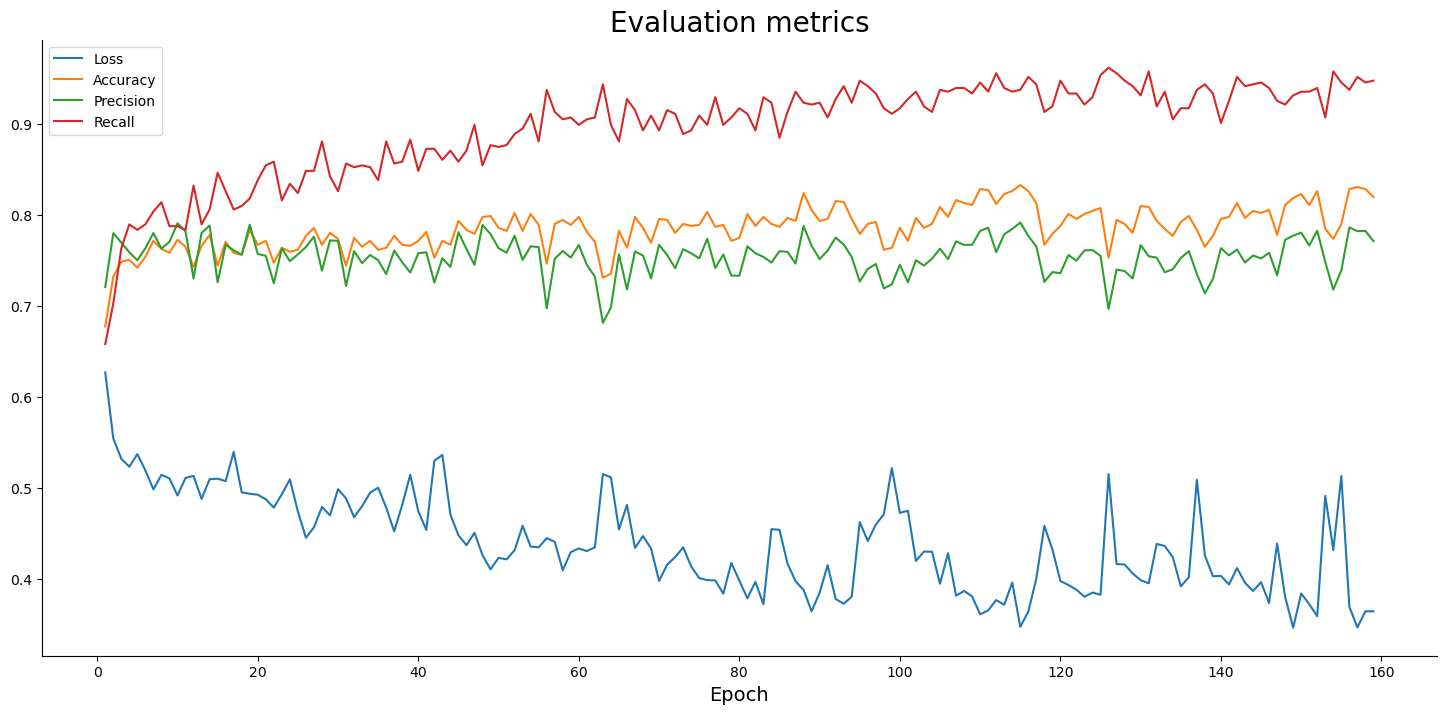

In [21]:
plt.plot(np.arange(1, 160), history.history['loss'], label = 'Loss')
plt.plot(np.arange(1, 160), history.history['accuarcy'], label = 'Accuracy')
plt.plot(np.arange(1, 160), history.history['precision'], label = 'Precision')
plt.plot(np.arange(1, 160), history.history['recall'], label = 'Recall')
plt.title('Evaluation metrics', size = 20)
plt.xlabel('Epoch', size=14)
plt.legend();

### Prediction probability

In [22]:
predictions = model.predict(x_test_scaled)

8/8 [==============================] - 0s 1ms/step


In [23]:
predictions

array([[6.2138784e-01],
       [6.2138784e-01],
       [3.3823248e-02],
       [6.3791056e-03],
       [7.0863253e-01],
       [1.0000000e+00],
       [5.0900495e-01],
       [2.6598540e-08],
       [8.3947825e-01],
       [2.6332146e-01],
       [6.2138784e-01],
       [9.9908650e-01],
       [8.2971030e-01],
       [1.0000000e+00],
       [6.2138784e-01],
       [6.2138784e-01],
       [7.0354080e-01],
       [6.2138784e-01],
       [6.2138784e-01],
       [9.9887121e-01],
       [9.9654704e-01],
       [9.0080160e-01],
       [1.3634571e-01],
       [1.0000000e+00],
       [9.0262175e-01],
       [3.0184406e-01],
       [9.9888748e-01],
       [9.9513310e-01],
       [3.6834869e-01],
       [8.1780809e-01],
       [6.2138784e-01],
       [9.7605622e-01],
       [6.2138784e-01],
       [7.5875849e-01],
       [8.4176910e-01],
       [7.7989451e-03],
       [4.0555462e-01],
       [9.9522132e-01],
       [1.0000000e+00],
       [6.2138784e-01],
       [9.9672586e-01],
       [6.213878

In [24]:
prediction_classes = [1 if prob >0.5 else 0 for prob in np.ravel(predictions)]

In [25]:
prediction_classes[:20]

[1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

### Confusion matrix

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
print(confusion_matrix(y_test, prediction_classes))

[[ 48  54]
 [ 15 112]]


In [28]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [29]:
print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.70
Precision: 0.67
Recall: 0.88
